**CNN - Basic convolutional neural networks**

Recommended reads: 
* https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050
* https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

**Convolutional neural network:**
![img 404](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)

CNN usually consists of a series of convolution + pooling layers, followed by fully connected layers

**Convolutions:** <br />
Definitions:
<img src="https://cdn-images-1.medium.com/max/1600/1*cTEp-IvCCUYPTT0QpE3Gjg@2x.png" alt="Drawing" style="width: 400px;"/>

**Input** - input image, usually a 3D array of RGB values. <br />
**Kernel** - filter, matrix operation that will be applied to transform input image <br />

Convolution - cell 1
<img src="https://cdn-images-1.medium.com/max/1600/1*ghaknijNGolaA3DpjvDxfQ@2x.png" alt="Drawing" style="width: 400px;"/>
Convolution - cell 2
<img src="https://cdn-images-1.medium.com/max/1600/1*oxOsZPfZFxgGZw2ycQnenw@2x.png" alt="Drawing" style="width: 400px;"/>


**Pooling:** <br />

<img src="https://cdn-images-1.medium.com/max/1600/1*ReZNSf_Yr7Q1nqegGirsMQ@2x.png" alt="Drawing" style="width: 400px;"/>

MaxPooling takes the maximum value from the selected cells. Main purpose is to downsample the input but keep the most important information


Demo showcase - let's start with the usual - sample photo of a cat!:

In [1]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# load an image from file
raw_image = load_img('./data/cnn_image/image_cat_2.jpeg', target_size=(224, 224))
plt.imshow(raw_image)

Using TensorFlow backend.


We are going to use a CNN that has already been trained for us and is publicly available - VGG16. It's a network consisting of 16 layers <a href="https://cdn-images-1.medium.com/max/1600/1*U8uoGoZDs8nwzQE3tOhfkw@2x.png">(see architecture)</a> and has already been pre-trained for us on <a href="http://www.image-net.org/"> Imagenet dataset </a>.

Due to it's popularity VGG16 is already included in some of the most popular ML frameworks - we will use the one  <a href="https://keras.io/applications/#vgg16">provided by Keras</a>.


In [2]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet', input_shape=(224, 224, 3))

Now we can convert our image to array of values.

In [3]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions

image_arr = img_to_array(raw_image)
image_arr.shape

(224, 224, 3)

Due to API requirements, we need an arary of images, therefore we add 1 dimension

In [4]:
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
image.shape

(1, 224, 224, 3)

Now we can run the prediction and see the output of our CNN network!

In [5]:
item = model.predict(image)
labels = decode_predictions(item)
print(labels)

[[('n02123394', 'Persian_cat', 0.9991867), ('n02127052', 'lynx', 0.0003814413), ('n02328150', 'Angora', 0.00016468475), ('n03958227', 'plastic_bag', 9.170757e-05), ('n03482405', 'hamper', 3.2461587e-05)]]


Usually it is advised to preprocess the image before feeding it into vgg16. Keras also provides us with functions for that. Let's see how our image would look like after preprocessing:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


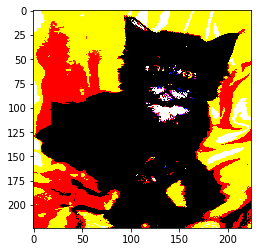

In [6]:
from keras.applications.vgg16 import preprocess_input

image_arr = img_to_array(raw_image)
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))

# prepare the image for the VGG model
image_processed = preprocess_input(image)
plt.imshow(image_processed[0])

Let's see how it would be classified by a network now!

In [7]:
item = model.predict(image_processed)
labels = decode_predictions(item)
print(labels)

[[('n02123394', 'Persian_cat', 0.98178196), ('n02127052', 'lynx', 0.005701773), ('n02123045', 'tabby', 0.003358725), ('n03958227', 'plastic_bag', 0.002392506), ('n02123597', 'Siamese_cat', 0.002104175)]]


** Part II - CNN Activation ** <br />
Let's try to analize why our network decided to say that the picture is a (persian) cat. We can use <a href="https://raghakot.github.io/keras-vis/">keras-vis</a> module to inspect our vgg16 network.

Great example can be found in attached <a href="https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/activation_maximization.ipynb">keras vis notebooks </a>

In [8]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Let's have a look how VGG16 "imagines" Persian cats to look like. We can expore the activation for "Persian cat" class. According to <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">this document</a>, Persian cat's ID is 283. We therefore explore what activate's the neuron responsible for class no. 283

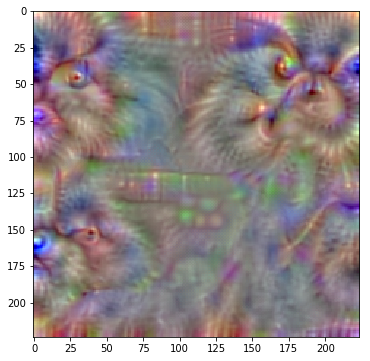

In [9]:
from vis.visualization import visualize_activation

CLASS_ID=283

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID)
plt.imshow(img)

Let's do a couple more iterations on activation function

Iteration: 1, named_losses: [('ActivationMax Loss', 0.048690856),
 ('L-6.0 Norm Loss', 0.06325863),
 ('TV(2.0) Loss', 6435.371)], overall loss: 6435.48291015625
Iteration: 2, named_losses: [('ActivationMax Loss', 0.050876647),
 ('L-6.0 Norm Loss', 0.0626874),
 ('TV(2.0) Loss', 3404.047)], overall loss: 3404.16064453125
Iteration: 3, named_losses: [('ActivationMax Loss', 0.013900699),
 ('L-6.0 Norm Loss', 0.06235203),
 ('TV(2.0) Loss', 1863.9244)], overall loss: 1864.000732421875
Iteration: 4, named_losses: [('ActivationMax Loss', -0.10420154),
 ('L-6.0 Norm Loss', 0.062135465),
 ('TV(2.0) Loss', 988.52075)], overall loss: 988.4786987304688
Iteration: 5, named_losses: [('ActivationMax Loss', -0.30595198),
 ('L-6.0 Norm Loss', 0.061992947),
 ('TV(2.0) Loss', 482.5045)], overall loss: 482.2605285644531
Iteration: 6, named_losses: [('ActivationMax Loss', -1.007813),
 ('L-6.0 Norm Loss', 0.061900456),
 ('TV(2.0) Loss', 201.89102)], overall loss: 200.9451141357422
Iteration: 7, named_losses:

Iteration: 55, named_losses: [('ActivationMax Loss', -67.11026),
 ('L-6.0 Norm Loss', 0.06189919),
 ('TV(2.0) Loss', 34.493565)], overall loss: -32.5547981262207
Iteration: 56, named_losses: [('ActivationMax Loss', -66.81891),
 ('L-6.0 Norm Loss', 0.061902367),
 ('TV(2.0) Loss', 36.16438)], overall loss: -30.59262466430664
Iteration: 57, named_losses: [('ActivationMax Loss', -70.42487),
 ('L-6.0 Norm Loss', 0.061907195),
 ('TV(2.0) Loss', 36.83688)], overall loss: -33.52608871459961
Iteration: 58, named_losses: [('ActivationMax Loss', -69.54996),
 ('L-6.0 Norm Loss', 0.061910726),
 ('TV(2.0) Loss', 37.21896)], overall loss: -32.26908493041992
Iteration: 59, named_losses: [('ActivationMax Loss', -70.26079),
 ('L-6.0 Norm Loss', 0.0619145),
 ('TV(2.0) Loss', 36.9811)], overall loss: -33.217777252197266
Iteration: 60, named_losses: [('ActivationMax Loss', -72.92764),
 ('L-6.0 Norm Loss', 0.061920106),
 ('TV(2.0) Loss', 37.80586)], overall loss: -35.05986404418945
Iteration: 61, named_loss

Iteration: 109, named_losses: [('ActivationMax Loss', -111.80375),
 ('L-6.0 Norm Loss', 0.062125307),
 ('TV(2.0) Loss', 53.095757)], overall loss: -58.64586639404297
Iteration: 110, named_losses: [('ActivationMax Loss', -113.21396),
 ('L-6.0 Norm Loss', 0.06212882),
 ('TV(2.0) Loss', 52.249798)], overall loss: -60.902034759521484
Iteration: 111, named_losses: [('ActivationMax Loss', -114.51752),
 ('L-6.0 Norm Loss', 0.06213483),
 ('TV(2.0) Loss', 54.689995)], overall loss: -59.76538848876953
Iteration: 112, named_losses: [('ActivationMax Loss', -113.66741),
 ('L-6.0 Norm Loss', 0.062139004),
 ('TV(2.0) Loss', 53.909348)], overall loss: -59.6959228515625
Iteration: 113, named_losses: [('ActivationMax Loss', -114.94174),
 ('L-6.0 Norm Loss', 0.062142942),
 ('TV(2.0) Loss', 55.451572)], overall loss: -59.42802810668945
Iteration: 114, named_losses: [('ActivationMax Loss', -113.70199),
 ('L-6.0 Norm Loss', 0.062149312),
 ('TV(2.0) Loss', 53.711006)], overall loss: -59.9288330078125
Iterati

Iteration: 163, named_losses: [('ActivationMax Loss', -133.09456),
 ('L-6.0 Norm Loss', 0.062349513),
 ('TV(2.0) Loss', 62.457703)], overall loss: -70.57450866699219
Iteration: 164, named_losses: [('ActivationMax Loss', -131.49748),
 ('L-6.0 Norm Loss', 0.062353227),
 ('TV(2.0) Loss', 62.82075)], overall loss: -68.6143798828125
Iteration: 165, named_losses: [('ActivationMax Loss', -135.50462),
 ('L-6.0 Norm Loss', 0.062356304),
 ('TV(2.0) Loss', 62.88401)], overall loss: -72.5582504272461
Iteration: 166, named_losses: [('ActivationMax Loss', -131.49004),
 ('L-6.0 Norm Loss', 0.062361293),
 ('TV(2.0) Loss', 62.13194)], overall loss: -69.29573059082031
Iteration: 167, named_losses: [('ActivationMax Loss', -137.4539),
 ('L-6.0 Norm Loss', 0.06236496),
 ('TV(2.0) Loss', 63.54787)], overall loss: -73.84367370605469
Iteration: 168, named_losses: [('ActivationMax Loss', -133.64276),
 ('L-6.0 Norm Loss', 0.062367875),
 ('TV(2.0) Loss', 62.351955)], overall loss: -71.22843933105469
Iteration: 1

Iteration: 217, named_losses: [('ActivationMax Loss', -147.95435),
 ('L-6.0 Norm Loss', 0.06255828),
 ('TV(2.0) Loss', 68.8342)], overall loss: -79.05758666992188
Iteration: 218, named_losses: [('ActivationMax Loss', -143.76598),
 ('L-6.0 Norm Loss', 0.062564425),
 ('TV(2.0) Loss', 68.44228)], overall loss: -75.2611312866211
Iteration: 219, named_losses: [('ActivationMax Loss', -148.74051),
 ('L-6.0 Norm Loss', 0.06256676),
 ('TV(2.0) Loss', 69.936226)], overall loss: -78.7417221069336
Iteration: 220, named_losses: [('ActivationMax Loss', -144.87422),
 ('L-6.0 Norm Loss', 0.06257153),
 ('TV(2.0) Loss', 68.54924)], overall loss: -76.26240539550781
Iteration: 221, named_losses: [('ActivationMax Loss', -150.84888),
 ('L-6.0 Norm Loss', 0.062574245),
 ('TV(2.0) Loss', 70.07673)], overall loss: -80.7095718383789
Iteration: 222, named_losses: [('ActivationMax Loss', -144.6078),
 ('L-6.0 Norm Loss', 0.0625812),
 ('TV(2.0) Loss', 68.72881)], overall loss: -75.81641387939453
Iteration: 223, nam

Iteration: 271, named_losses: [('ActivationMax Loss', -149.4843),
 ('L-6.0 Norm Loss', 0.06276703),
 ('TV(2.0) Loss', 72.00053)], overall loss: -77.42101287841797
Iteration: 272, named_losses: [('ActivationMax Loss', -155.05241),
 ('L-6.0 Norm Loss', 0.06276941),
 ('TV(2.0) Loss', 72.92785)], overall loss: -82.0617904663086
Iteration: 273, named_losses: [('ActivationMax Loss', -153.3361),
 ('L-6.0 Norm Loss', 0.06277342),
 ('TV(2.0) Loss', 71.93311)], overall loss: -81.34021759033203
Iteration: 274, named_losses: [('ActivationMax Loss', -157.43861),
 ('L-6.0 Norm Loss', 0.06277538),
 ('TV(2.0) Loss', 72.64695)], overall loss: -84.72888946533203
Iteration: 275, named_losses: [('ActivationMax Loss', -155.03902),
 ('L-6.0 Norm Loss', 0.062781945),
 ('TV(2.0) Loss', 72.94826)], overall loss: -82.02798461914062
Iteration: 276, named_losses: [('ActivationMax Loss', -155.00282),
 ('L-6.0 Norm Loss', 0.06278272),
 ('TV(2.0) Loss', 73.37848)], overall loss: -81.56155395507812
Iteration: 277, na

Iteration: 325, named_losses: [('ActivationMax Loss', -155.57741),
 ('L-6.0 Norm Loss', 0.0629709),
 ('TV(2.0) Loss', 77.95664)], overall loss: -77.55779266357422
Iteration: 326, named_losses: [('ActivationMax Loss', -165.5443),
 ('L-6.0 Norm Loss', 0.06297471),
 ('TV(2.0) Loss', 76.31288)], overall loss: -89.16844177246094
Iteration: 327, named_losses: [('ActivationMax Loss', -157.55592),
 ('L-6.0 Norm Loss', 0.06297983),
 ('TV(2.0) Loss', 77.3632)], overall loss: -80.12975311279297
Iteration: 328, named_losses: [('ActivationMax Loss', -163.29918),
 ('L-6.0 Norm Loss', 0.06298166),
 ('TV(2.0) Loss', 76.223114)], overall loss: -87.01307678222656
Iteration: 329, named_losses: [('ActivationMax Loss', -158.91243),
 ('L-6.0 Norm Loss', 0.06298645),
 ('TV(2.0) Loss', 76.08897)], overall loss: -82.7604751586914
Iteration: 330, named_losses: [('ActivationMax Loss', -162.29967),
 ('L-6.0 Norm Loss', 0.06298916),
 ('TV(2.0) Loss', 76.726974)], overall loss: -85.50970458984375
Iteration: 331, na

Iteration: 379, named_losses: [('ActivationMax Loss', -162.16008),
 ('L-6.0 Norm Loss', 0.06318135),
 ('TV(2.0) Loss', 80.4822)], overall loss: -81.61469268798828
Iteration: 380, named_losses: [('ActivationMax Loss', -171.54213),
 ('L-6.0 Norm Loss', 0.06318524),
 ('TV(2.0) Loss', 80.021996)], overall loss: -91.45694732666016
Iteration: 381, named_losses: [('ActivationMax Loss', -159.50404),
 ('L-6.0 Norm Loss', 0.06318977),
 ('TV(2.0) Loss', 78.622604)], overall loss: -80.81825256347656
Iteration: 382, named_losses: [('ActivationMax Loss', -171.9311),
 ('L-6.0 Norm Loss', 0.0631915),
 ('TV(2.0) Loss', 79.07681)], overall loss: -92.79110717773438
Iteration: 383, named_losses: [('ActivationMax Loss', -159.21223),
 ('L-6.0 Norm Loss', 0.06319798),
 ('TV(2.0) Loss', 78.11461)], overall loss: -81.034423828125
Iteration: 384, named_losses: [('ActivationMax Loss', -172.47215),
 ('L-6.0 Norm Loss', 0.063200004),
 ('TV(2.0) Loss', 79.18268)], overall loss: -93.22627258300781
Iteration: 385, na

Iteration: 433, named_losses: [('ActivationMax Loss', -172.764),
 ('L-6.0 Norm Loss', 0.06340356),
 ('TV(2.0) Loss', 80.69611)], overall loss: -92.0044937133789
Iteration: 434, named_losses: [('ActivationMax Loss', -164.70093),
 ('L-6.0 Norm Loss', 0.06340784),
 ('TV(2.0) Loss', 80.4358)], overall loss: -84.20172882080078
Iteration: 435, named_losses: [('ActivationMax Loss', -175.17502),
 ('L-6.0 Norm Loss', 0.06341247),
 ('TV(2.0) Loss', 80.52312)], overall loss: -94.58848571777344
Iteration: 436, named_losses: [('ActivationMax Loss', -162.54059),
 ('L-6.0 Norm Loss', 0.06341683),
 ('TV(2.0) Loss', 80.57049)], overall loss: -81.90668487548828
Iteration: 437, named_losses: [('ActivationMax Loss', -175.3972),
 ('L-6.0 Norm Loss', 0.063419975),
 ('TV(2.0) Loss', 80.87138)], overall loss: -94.46240234375
Iteration: 438, named_losses: [('ActivationMax Loss', -159.31548),
 ('L-6.0 Norm Loss', 0.06342569),
 ('TV(2.0) Loss', 79.23921)], overall loss: -80.01283264160156
Iteration: 439, named_l

Iteration: 487, named_losses: [('ActivationMax Loss', -172.29567),
 ('L-6.0 Norm Loss', 0.06365507),
 ('TV(2.0) Loss', 80.90023)], overall loss: -91.33177947998047
Iteration: 488, named_losses: [('ActivationMax Loss', -174.61575),
 ('L-6.0 Norm Loss', 0.06365569),
 ('TV(2.0) Loss', 81.97484)], overall loss: -92.57725524902344
Iteration: 489, named_losses: [('ActivationMax Loss', -172.2302),
 ('L-6.0 Norm Loss', 0.06366387),
 ('TV(2.0) Loss', 81.24756)], overall loss: -90.91897583007812
Iteration: 490, named_losses: [('ActivationMax Loss', -174.7661),
 ('L-6.0 Norm Loss', 0.063666),
 ('TV(2.0) Loss', 83.21456)], overall loss: -91.48787689208984
Iteration: 491, named_losses: [('ActivationMax Loss', -174.21103),
 ('L-6.0 Norm Loss', 0.06367496),
 ('TV(2.0) Loss', 81.41258)], overall loss: -92.73477172851562
Iteration: 492, named_losses: [('ActivationMax Loss', -174.80595),
 ('L-6.0 Norm Loss', 0.06367711),
 ('TV(2.0) Loss', 83.654076)], overall loss: -91.08820343017578
Iteration: 493, nam

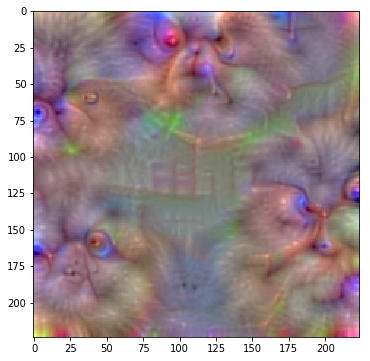

In [10]:
img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID, max_iter=500, verbose=True)
plt.imshow(img)

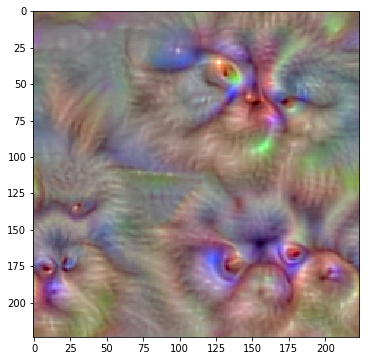

In [13]:
from vis.input_modifiers import Jitter


# Jitter 16 pixels along all dimensions to during the optimization process.
img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID, max_iter=500, input_modifiers=[Jitter(16)])
plt.imshow(img)

In the end, let's try to plot heatmap of our CNN and see which part of image triggered it to believe that this is a persian cat

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


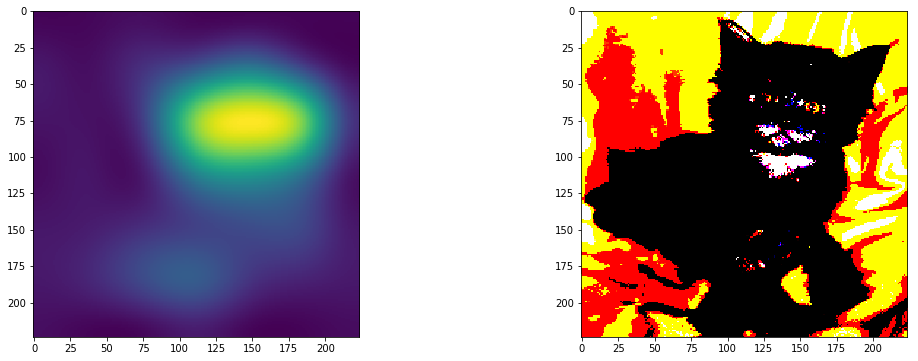

In [12]:
from vis.visualization import visualize_cam

img = visualize_cam(model, layer_idx, filter_indices=CLASS_ID, seed_input=image_processed)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_processed[0])